# **Desafio Final Cientista de Dados**

O desafio consiste em analisar os dados dos milhares de alunos matriculados em nossa instituição, espalhados por todos os estados brasileiros.

Coletando informações demográficas, padrões de estudo e resultados de testes, seu objetivo é descobrir como podemos melhorar o ensino e maximizar o sucesso acadêmico dos alunos.

# PREPARAÇÃO DOS DADOS

## 1 - Importando os dados dos datasets

In [1]:
import os
import pandas as pd

PATH = 'alunos_por_estado/'
lista_path = os.listdir(PATH)

In [2]:
lista_df = [] # cria uma lista vazia
for arquivo in lista_path:
    local_arquivo = os.path.join(PATH, arquivo)
    if arquivo.endswith('.csv'):
        df = pd.read_csv(local_arquivo, sep = ';', encoding='latin-1')
        lista_df.append(df)

In [3]:
df_alunos = pd.concat(lista_df)

In [5]:
df_estados = pd.read_csv('estado_regiao.csv', sep = ';', encoding='latin-1')

## 2 - Analisando os dados importados para os datasets

In [6]:
df_alunos.head()

,idade,gênero,cod_estado,horas_sono,atividade_extracurricular,tempo_estudo,nota
0,18,Feminino,11,7.23,Sim,3.17,18.65
1,19,Masculino,11,8.73,Sim,2.35,19.69
2,27,Feminino,11,7.81,Não,1.72,19.45
3,21,Feminino,11,7.10,Sim,4.43,25.66
4,19,Feminino,11,6.56,Não,5.08,31.84


In [7]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [8]:
df_alunos.describe()

,idade,cod_estado,horas_sono,tempo_estudo,nota
count,1101.000000,1101.000000,1086.000000,1101.000000,1101.000000
mean,23.448683,14.062670,7.017634,3.947984,25.407094
std,3.469392,7.532999,1.005290,1.522734,9.844194
min,18.000000,1.000000,4.000000,0.000000,-1.340000
25%,20.000000,8.000000,6.320000,2.920000,19.590000
50%,23.000000,14.000000,7.040000,3.930000,24.600000
75%,26.000000,20.000000,7.717500,5.000000,30.140000
max,29.000000,27.000000,10.000000,8.970000,80.390000


In [9]:
df_estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [10]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1101 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   idade                      1101 non-null   int64  
 1   gênero                     1101 non-null   object 
 2   cod_estado                 1101 non-null   int64  
 3   horas_sono                 1086 non-null   float64
 4   atividade_extracurricular  1101 non-null   object 
 5   tempo_estudo               1101 non-null   float64
 6   nota                       1101 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 68.8+ KB


In [11]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


## 3 - Tratando dados nulos / em branco / duplicados

In [12]:
df_estados.isna().sum()

id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64

In [13]:
df_alunos.isna().sum()

idade                         0
gênero                        0
cod_estado                    0
horas_sono                   15
atividade_extracurricular     0
tempo_estudo                  0
nota                          0
dtype: int64

In [14]:
df_alunos.loc[df_alunos['horas_sono'].isnull()]

,idade,gênero,cod_estado,horas_sono,atividade_extracurricular,tempo_estudo,nota
5,25,Masculino,8,NaN,Não,2.81,15.23
6,18,Feminino,8,NaN,Não,4.57,27.92
7,19,Feminino,8,NaN,Não,2.38,16.13
8,23,Feminino,8,NaN,Não,2.28,20.11
9,28,Feminino,8,NaN,Não,2.54,18.34
10,19,Feminino,8,NaN,Não,2.33,12.92
11,26,Feminino,8,NaN,Não,3.40,22.89
12,29,Masculino,16,NaN,Sim,6.40,37.84
13,26,Feminino,16,NaN,Não,5.96,33.69
14,19,Masculino,16,NaN,Sim,2.73,18.96


In [19]:
# obtendo a media das horas de sono arredondado para duas casas decimais, para preencher os campos que estao vazios
media_horas_sono = df_alunos.horas_sono.mean().round(2)
media_horas_sono

7.02

In [20]:
# preencher valores ausentes pela média
df_alunos.horas_sono.fillna(media_horas_sono, inplace=True)

In [21]:
df_alunos.isna().sum()

idade                        0
gênero                       0
cod_estado                   0
horas_sono                   0
atividade_extracurricular    0
tempo_estudo                 0
nota                         0
dtype: int64

In [22]:
df_estados.duplicated().sum()

0

In [24]:
df_alunos.duplicated().sum()

101

In [25]:
# eliminando dados duplicados
df_alunos = df_alunos.drop_duplicates()

In [26]:
df_alunos.duplicated().sum()

0

In [27]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   idade                      1000 non-null   int64  
 1   gênero                     1000 non-null   object 
 2   cod_estado                 1000 non-null   int64  
 3   horas_sono                 1000 non-null   float64
 4   atividade_extracurricular  1000 non-null   object 
 5   tempo_estudo               1000 non-null   float64
 6   nota                       1000 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 62.5+ KB


## 4 - Juntando os dois datasets em um unico

In [29]:
# ajustando os nomes das colunas primeiro
df_alunos.rename(columns={'gênero' : 'genero', 'cod_estado' : 'id_estado'}, inplace=True)

In [30]:
df_alunos.head()

,idade,genero,id_estado,horas_sono,atividade_extracurricular,tempo_estudo,nota
0,18,Feminino,11,7.23,Sim,3.17,18.65
1,19,Masculino,11,8.73,Sim,2.35,19.69
2,27,Feminino,11,7.81,Não,1.72,19.45
3,21,Feminino,11,7.10,Sim,4.43,25.66
4,19,Feminino,11,6.56,Não,5.08,31.84


In [31]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [32]:
# juntando os dados em um unico dataframe
df_completo = pd.merge(df_alunos, df_estados, on='id_estado')

In [33]:
df_completo.head()

,idade,genero,id_estado,horas_sono,atividade_extracurricular,tempo_estudo,nota,sigla,estado,regiao,pais
0,18,Feminino,11,7.23,Sim,3.17,18.65,MT,Mato Grosso,Centro-Oeste,Brasil
1,19,Masculino,11,8.73,Sim,2.35,19.69,MT,Mato Grosso,Centro-Oeste,Brasil
2,27,Feminino,11,7.81,Não,1.72,19.45,MT,Mato Grosso,Centro-Oeste,Brasil
3,21,Feminino,11,7.10,Sim,4.43,25.66,MT,Mato Grosso,Centro-Oeste,Brasil
4,19,Feminino,11,6.56,Não,5.08,31.84,MT,Mato Grosso,Centro-Oeste,Brasil


In [35]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   idade                      1000 non-null   int64  
 1   genero                     1000 non-null   object 
 2   id_estado                  1000 non-null   int64  
 3   horas_sono                 1000 non-null   float64
 4   atividade_extracurricular  1000 non-null   object 
 5   tempo_estudo               1000 non-null   float64
 6   nota                       1000 non-null   float64
 7   sigla                      1000 non-null   object 
 8   estado                     1000 non-null   object 
 9   regiao                     1000 non-null   object 
 10  pais                       1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [36]:
df_completo.reset_index(drop=True)

,idade,genero,id_estado,horas_sono,atividade_extracurricular,tempo_estudo,nota,sigla,estado,regiao,pais
0,18,Feminino,11,7.23,Sim,3.17,18.65,MT,Mato Grosso,Centro-Oeste,Brasil
1,19,Masculino,11,8.73,Sim,2.35,19.69,MT,Mato Grosso,Centro-Oeste,Brasil
2,27,Feminino,11,7.81,Não,1.72,19.45,MT,Mato Grosso,Centro-Oeste,Brasil
3,21,Feminino,11,7.10,Sim,4.43,25.66,MT,Mato Grosso,Centro-Oeste,Brasil
4,19,Feminino,11,6.56,Não,5.08,31.84,MT,Mato Grosso,Centro-Oeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...
995,21,Feminino,23,7.23,Sim,8.11,57.62,RR,Roraima,Norte,Brasil
996,18,Masculino,23,7.28,Sim,2.16,14.66,RR,Roraima,Norte,Brasil
997,18,Feminino,23,8.82,Não,2.33,14.65,RR,Roraima,Norte,Brasil
998,19,Masculino,23,7.81,Sim,3.47,24.67,RR,Roraima,Norte,Brasil


# Explorando o Dataset

In [37]:
import matplotlib.pyplot as plt

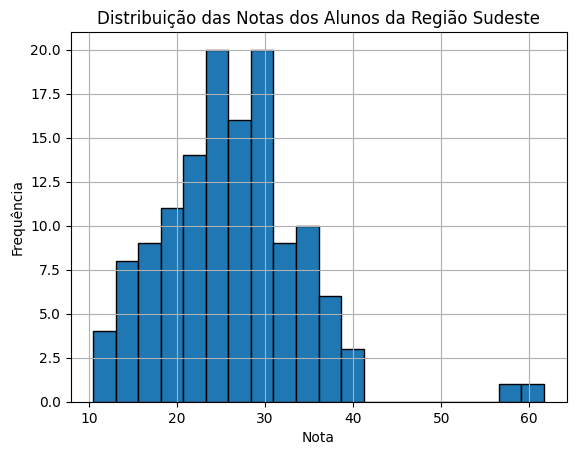

In [41]:
#Separando o df por região
df_sudeste = df_completo[df_completo['regiao'] == 'Sudeste']

# Criando o histograma com 20 barras
plt.hist(df_sudeste['nota'], bins=20, edgecolor='black')
plt.title('Distribuição das Notas dos Alunos da Região Sudeste')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [42]:
import seaborn as sns

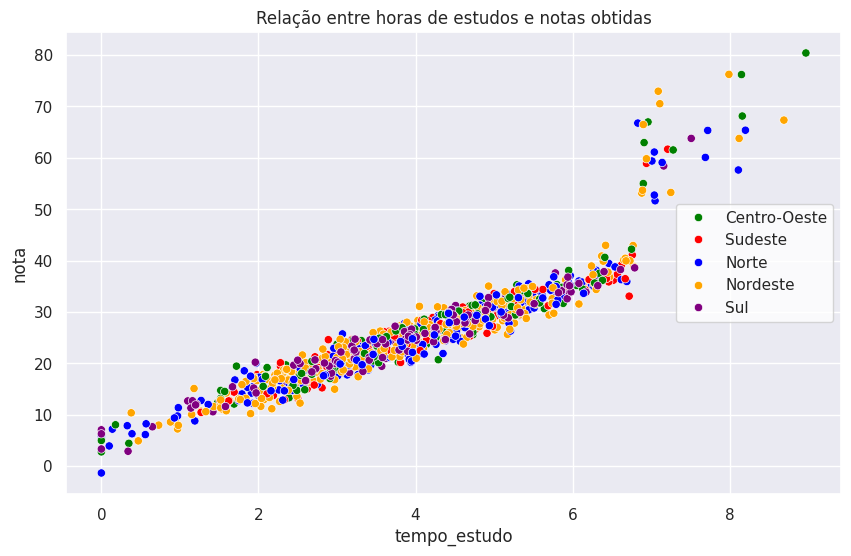

In [43]:
# Criando Scatter Plot
sns.set(style='darkgrid')    # Ajuste opcional para um fundo branco com linhas de grade
plt.figure(figsize=(10, 6))  # Ajuste opcional para o tamanho do gráfico

# Scatter Plot com legenda na parte superior direita e cores personalizadas
scatter_plot = sns.scatterplot(data=df_completo,
                               x='tempo_estudo',
                               y='nota',
                               hue='regiao',
                               palette={'Norte': 'blue',
                                        'Nordeste': 'orange',
                                        'Centro-Oeste': 'green',
                                        'Sudeste': 'red',
                                        'Sul': 'purple'})

# Adicionando legenda na parte superior direita com fundo branco
scatter_plot.legend(loc='center right', facecolor='white')

# Nomeando o gráfico
plt.title('Relação entre horas de estudos e notas obtidas')

# Exibindo o gráfico
plt.show()

In [58]:
# media de horas de sono dos alunos da regiao sudeste
df_sudeste.horas_sono.mean()

6.9147727272727275

In [46]:
df_nordeste = df_completo[df_completo['regiao'] == 'Nordeste']

In [61]:
# Maior valor na média das idades na regiao Nordeste
df_nordeste.groupby('estado')['idade'].mean().sort_values(ascending=False)

estado
Bahia                  24.392857
Rio Grande do Norte    24.314286
Maranhão               24.111111
Alagoas                23.119048
Piauí                  23.103448
Ceará                  23.022222
Paraíba                22.714286
Pernambuco             22.388889
Sergipe                22.266667
Name: idade, dtype: float64

In [62]:
# Estado que mais se destaca com maior número de estudantes que fizeram atividade extracurricular
df_completo[(df_completo.atividade_extracurricular == 'Sim')].groupby('estado')['atividade_extracurricular'].count().sort_values(ascending=False)

estado
Paraná                 30
Ceará                  26
Pará                   25
Minas Gerais           25
Alagoas                24
Amazonas               24
Maranhão               23
Mato Grosso            23
São Paulo              22
Rondônia               22
Rio Grande do Sul      22
Santa Catarina         20
Paraíba                20
Tocantins              20
Roraima                19
Rio Grande do Norte    18
Sergipe                18
Distrito Federal       15
Amapá                  15
Pernambuco             14
Bahia                  14
Acre                   13
Mato Grosso do Sul     11
Piauí                  11
Rio de Janeiro          8
Goiás                   6
Espírito Santo          6
Name: atividade_extracurricular, dtype: int64

In [67]:
# qual estado possui mais estudantes com nota abaixo de 30 
df_completo[(df_completo.nota < 30)].groupby('estado')['nota'].count().sort_values(ascending=False)

estado
Paraná                 41
Maranhão               35
Paraíba                33
Minas Gerais           33
Pará                   32
Tocantins              32
Alagoas                31
Santa Catarina         31
Mato Grosso            30
Rio Grande do Sul      30
Roraima                29
Ceará                  29
Mato Grosso do Sul     29
Rondônia               29
Pernambuco             28
Rio Grande do Norte    27
São Paulo              26
Amazonas               26
Sergipe                26
Amapá                  25
Piauí                  25
Bahia                  24
Distrito Federal       23
Acre                   23
Espírito Santo         22
Rio de Janeiro         15
Goiás                  12
Name: nota, dtype: int64

In [68]:
# prompt: correlacao entre tempo de estudo e nota
df_completo['tempo_estudo'].corr(df_completo['nota'])

0.9186470034657563

In [74]:
# modelo de regressao linear para estimar a nota de um estudante que estudou durante 10 horas
from sklearn.linear_model import LinearRegression

#Estimativa da nota de um estudante que estudou 10 horas
x = df_completo[['tempo_estudo']]
y = df_completo['nota']

# Criar um modelo de regressão linear
modelo = LinearRegression()

# Ajustar o modelo aos dados
modelo.fit(x, y)

# Prever a nota para um estudante que estudou 10 horas
tempo_de_estudo_novo = [[10]]
nota_estimada = modelo.predict(tempo_de_estudo_novo)

print(f"Nota estimada para um estudante que estudou 10 horas: {nota_estimada[0]:.2f}")

Nota estimada para um estudante que estudou 10 horas: 61.63


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
# coeficiente angular da reta
modelo.coef_

array([5.98404688])

In [77]:
from sklearn.metrics import r2_score

In [78]:
# coeficiente de determinacao r²
y_pred = modelo.predict(x)
r2 = r2_score(y, y_pred)
r2

0.8439123169766128

In [79]:
# coeficiente de determinacao r² - calculado de outra forma
modelo.score(x,y)

0.8439123169766128

In [84]:
# calculo do MAE (mean absolute error)

from sklearn.metrics import mean_absolute_error

y_pred = modelo.predict(x)
mae = mean_absolute_error(y, y_pred)

print(f"Mean absolute error: {mae:.2f}")


Mean absolute error: 2.41


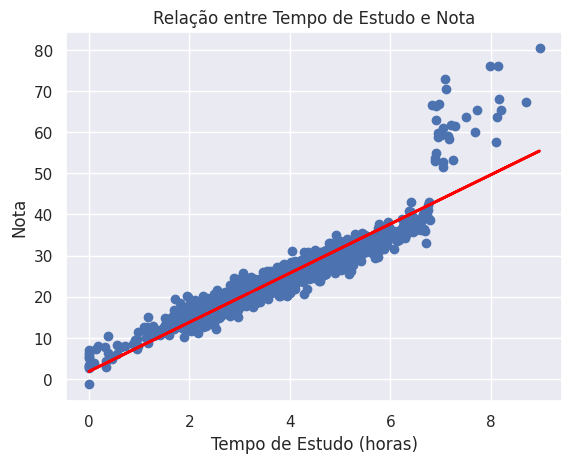

In [86]:
# Criando o gráfico de dispersão
plt.scatter(df_completo['tempo_estudo'], df_completo['nota'])

# Adicionando a reta de regressão
plt.plot(x, modelo.predict(x), color='red', linewidth=2)

# Adicionando título e rótulos dos eixos
plt.title('Relação entre Tempo de Estudo e Nota')
plt.xlabel('Tempo de Estudo (horas)')
plt.ylabel('Nota')

# Exibindo o gráfico
plt.show()
